# Data Science Engineering 

Project - Analysis of Consumer Complaint Database


## Consumer Complaints Dataset
Data: Consumer complaints received about financial products and services

These are real world complaints received about financial products and services. Each complaint has been labeled with a specific product; therefore, this is a supervised text classification problem. With the aim to classify future complaints based on its content, we used different machine learning algorithms can make more accurate predictions (i.e., classify the complaint in one of the product categories).

### Goal:
Classification of Consumer Narratives to their respective Product Category and Predicting if a consumer will dispute or not based on the features.

Classification algorithms: Linear Support Vector Machine (LinearSVM), Random Forest, Multinomial Naive Bayes and Logistic Regression.

Note: Text classification is an example of supervised machine learning since we train the model with labelled data (complaints about and specific finance product is used for train a classifier.

In [1]:
# Input data files are available in the "../input/" directory.
import pandas as pd
import numpy as np
from scipy.stats import randint
import seaborn as sns # used for plot interactive graph. 
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.exceptions import ConvergenceWarning
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.subplots as tls
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.offline as pyoff
#pyoff.init_notebook_mode()
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [2]:
# loading data
df = pd.read_csv('rows.csv')
df.shape


(1282355, 18)

In [3]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,05/10/2019,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,NaN,NaN,NAVY FEDERAL CREDIT UNION,FL,328XX,Older American,NaN,Web,05/10/2019,In progress,Yes,NaN,3238275
1,05/10/2019,Checking or savings account,Other banking product or service,Managing an account,Deposits and withdrawals,NaN,NaN,BOEING EMPLOYEES CREDIT UNION,WA,98204,NaN,NaN,Referral,05/10/2019,Closed with explanation,Yes,NaN,3238228
2,05/10/2019,Debt collection,Payday loan debt,Communication tactics,Frequent or repeated calls,NaN,NaN,CURO Intermediate Holdings,TX,751XX,NaN,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3237964
3,05/10/2019,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Old information reappears or never goes away,NaN,NaN,Ad Astra Recovery Services Inc,LA,708XX,NaN,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3238479
4,05/10/2019,Checking or savings account,Checking account,Managing an account,Banking errors,NaN,NaN,ALLY FINANCIAL INC.,AZ,85205,NaN,NaN,Postal mail,05/10/2019,In progress,Yes,NaN,3238460


## Part 1: DATA EXPLORATION

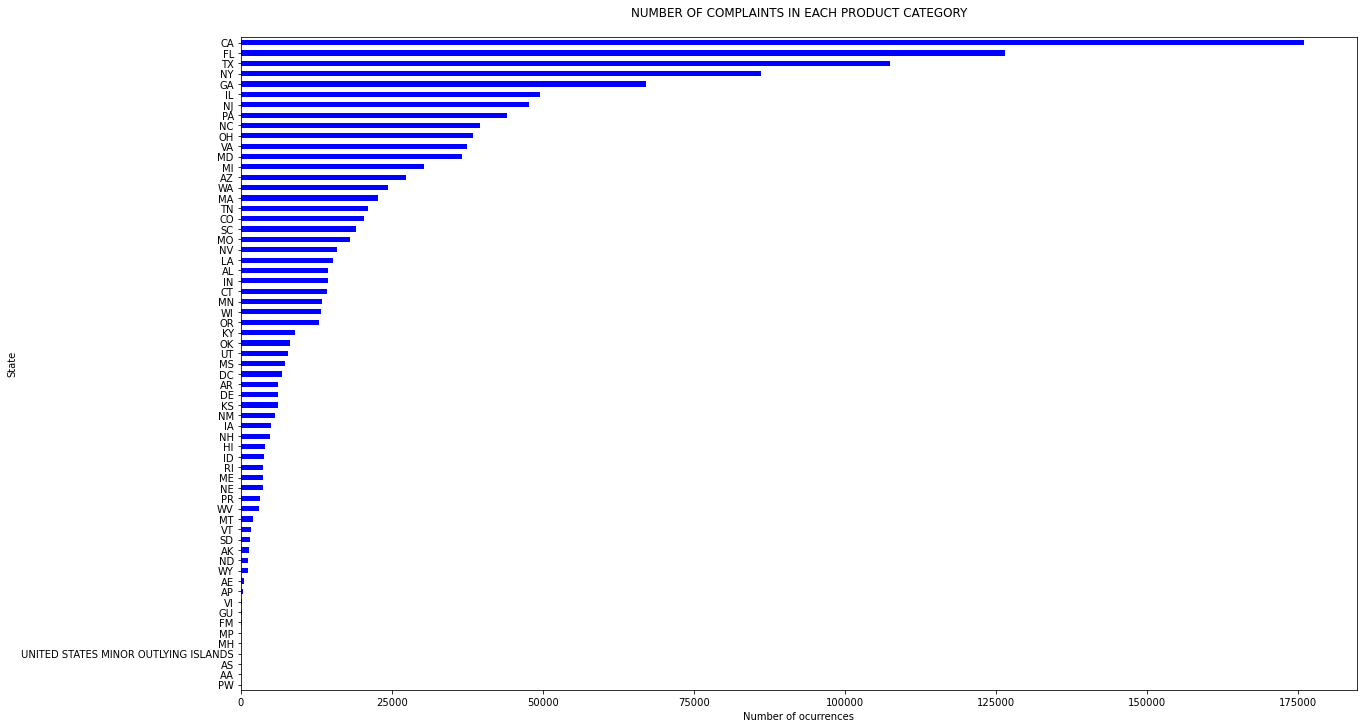

In [5]:
fig = plt.figure(figsize=(20,12))
df.groupby(['State'])['Complaint ID'].count().sort_values().plot.barh(
    ylim=0, color='blue', title= 'NUMBER OF COMPLAINTS IN EACH PRODUCT CATEGORY\n')
plt.xlabel('Number of ocurrences', fontsize = 10);

California has the highest number of complaints as compared to others. Let's see what are these complaints about.

In [6]:
df[df['State'] == 'CA']['Product'].value_counts()

Mortgage                                                                        46894
Debt collection                                                                 30718
Credit reporting, credit repair services, or other personal consumer reports    27400
Credit reporting                                                                18119
Credit card                                                                     12318
Bank account or service                                                         12163
Credit card or prepaid card                                                      7137
Checking or savings account                                                      5864
Student loan                                                                     5406
Consumer Loan                                                                    3798
Money transfer, virtual currency, or money service                               1578
Vehicle loan or lease                                 

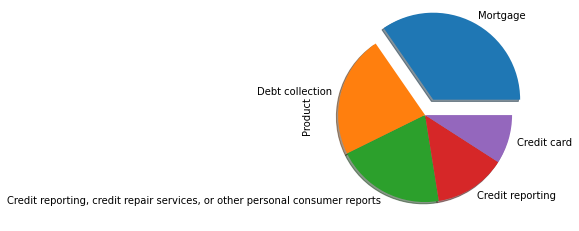

In [7]:
df[df['State'] == 'CA']['Product'].value_counts().head(5).plot.pie(explode=[0.2,0,0,0,0],shadow=True)
# Unsquish the pie.
import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')

The state of California mainly has most complaints around Mortgage. Let's find out what kind of issues are raised for this particular product.

In [8]:
df[df['State'] == 'CA']['Issue'].value_counts().head(10)

Loan modification,collection,foreclosure                                            22282
Incorrect information on your report                                                16631
Incorrect information on credit report                                              12994
Loan servicing, payments, escrow account                                            11195
Cont'd attempts collect debt not owed                                                8456
Problem with a credit reporting company's investigation into an existing problem     5796
Account opening, closing, or management                                              5751
Attempts to collect debt not owed                                                    4942
Communication tactics                                                                4089
Improper use of your report                                                          4068
Name: Issue, dtype: int64

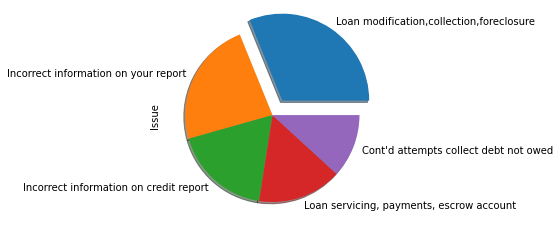

In [9]:
df[df['State'] == 'CA']['Issue'].value_counts().head(5).plot.pie(explode=[0.2,0,0,0,0],shadow=True)
# Unsquish the pie.
import matplotlib.pyplot as plt
plt.gca().set_aspect('equal')

The primary issues for all the complaints in California are Loan modification,collection,foreclosure,Loan servicing, payments, escrow account.

### various product types

In [10]:
p_product_discussions = round(df["Product"].value_counts() / len(df["Product"]) * 100,2)

print(p_product_discussions)

labels = list(p_product_discussions.index)
values = p_product_discussions.values.tolist()
colors = ['#F78181', '#F5A9BC', '#2E9AFE', '#58FA58', '#FAAC58', '#088A85', '#8A0808', '#848484', '#F781F3', '#D7DF01', '#2E2EFE']


product_pie = go.Pie(labels=labels, values=values, 
                          marker=dict(colors=colors,
                         line=dict(color='#FAAC58', width=2)))

layout = go.Layout(title='Product Types')

fig = go.Figure(data=[product_pie], layout=layout)
iplot(fig)

Mortgage                                                                        21.69
Debt collection                                                                 19.10
Credit reporting, credit repair services, or other personal consumer reports    17.62
Credit reporting                                                                10.95
Credit card                                                                      6.96
Bank account or service                                                          6.72
Student loan                                                                     4.03
Credit card or prepaid card                                                      3.72
Checking or savings account                                                      3.17
Consumer Loan                                                                    2.46
Vehicle loan or lease                                                            0.89
Money transfer, virtual currency, or money service    

In [11]:
# Building the variables for our graphs
disputed = df['Consumer disputed?'].value_counts()
company_response = df['Company response to consumer'].value_counts()
top5_disputed = df['Company'].loc[df['Consumer disputed?'] == 'Yes'].value_counts()[:5]
top5_nodispute = df['Company'].loc[df['Consumer disputed?'] == 'No'].value_counts()[:5]

In [13]:
# Top three subplots
total_complaints_plotly = go.Bar(
            x=disputed.index.values,
            y=disputed.values,
    text = 'Complaints',
    showlegend=False,
    marker=dict(
        color=['#40FF00', '#FF0000'])
    )

top5_disputes_plotly = go.Bar(
            x=top5_disputed.index.values,
            y=top5_disputed.values,
    text='Disputes',
    showlegend=False,
    marker=dict(
        color=top5_disputed.values,
        colorscale='Reds')
    )

top5_nodisputes_plotly = go.Bar(
            x=top5_nodispute.index.values,
            y=top5_nodispute.values,
    text='No Disputes',
    showlegend=False,
    marker=dict(
        color=top5_nodispute.values,
        colorscale='Blues')
    )

# Lower Subplot
customer_res_plotly = go.Bar(
            x=company_response.index.values,
            y=company_response.values,
    text='Customer Response',
    showlegend=False,
        marker=dict(
        color=df['Company response to consumer'].value_counts().values,
        colorscale = [[0.0, 'rgb(165,0,38)'], [0.1111111111111111, 'rgb(215,48,39)'], [0.2222222222222222, 'rgb(244,109,67)'], 
                      [0.3333333333333333, 'rgb(253,174,97)'], [0.4444444444444444, 'rgb(254,224,144)'], 
                      [0.5555555555555556, 'rgb(224,243,248)'], [0.6666666666666666, 'rgb(171,217,233)'], 
                      [0.7777777777777778, 'rgb(116,173,209)'], [0.8888888888888888, 'rgb(69,117,180)'], 
                      [1.0, 'rgb(49,54,149)']],
        reversescale = True
        )
)

fig = tls.make_subplots(rows=2, cols=3, specs=[[{}, {}, {}], [{'colspan': 3}, None, None]],
                          subplot_titles=('Did the Customer Disputed?',
                                          'Disputes',
                                         'No Disputes',
                                         'Company response to consumer'))

# First three Subplots
fig.append_trace(total_complaints_plotly, 1, 1)
fig.append_trace(top5_disputes_plotly , 1, 2)
fig.append_trace(top5_nodisputes_plotly , 1, 3)

# Lower Subplot
fig.append_trace(customer_res_plotly, 2, 1)



fig['layout'].update(showlegend=True, height=600, width=800, title='Sectors')
iplot(fig, filename='Complaints')

In [14]:
df['Date received'] = pd.to_datetime(df['Date received'])
df['year_received'], df['month_received'] = df['Date received'].dt.year, df['Date received'].dt.month
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,year_received,month_received
0,2019-05-10,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,NaN,NaN,NAVY FEDERAL CREDIT UNION,FL,328XX,Older American,NaN,Web,05/10/2019,In progress,Yes,NaN,3238275,2019,5
1,2019-05-10,Checking or savings account,Other banking product or service,Managing an account,Deposits and withdrawals,NaN,NaN,BOEING EMPLOYEES CREDIT UNION,WA,98204,NaN,NaN,Referral,05/10/2019,Closed with explanation,Yes,NaN,3238228,2019,5
2,2019-05-10,Debt collection,Payday loan debt,Communication tactics,Frequent or repeated calls,NaN,NaN,CURO Intermediate Holdings,TX,751XX,NaN,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3237964,2019,5
3,2019-05-10,"Credit reporting, credit repair services, or o...",Credit reporting,Incorrect information on your report,Old information reappears or never goes away,NaN,NaN,Ad Astra Recovery Services Inc,LA,708XX,NaN,NaN,Web,05/10/2019,Closed with explanation,Yes,NaN,3238479,2019,5
4,2019-05-10,Checking or savings account,Checking account,Managing an account,Banking errors,NaN,NaN,ALLY FINANCIAL INC.,AZ,85205,NaN,NaN,Postal mail,05/10/2019,In progress,Yes,NaN,3238460,2019,5


In [22]:
# Create a Line Plot by the top 5 companies  by year who had more customer interaction cases (Disputes and No Disputes)
sorting_groups = df.groupby(['year_received', 'Consumer disputed?'])['Company'].apply(lambda x: x.value_counts())
d = {'CRM': sorting_groups}


year_crm = pd.DataFrame(data=d).reset_index()
year_crm.sort_values(by='CRM', ascending=False)

crm_df = year_crm.rename(columns={"level_2": "Company"})

# Conditionals Top 5 Companies with dispues (Bank of America, Wells Fargo, JP Morgan, Equifax, CitiBank)
boa_disputes = crm_df.loc[(crm_df['Company'] == 'Bank of America') & (crm_df['Consumer disputed?'] == 'Yes')]
wfc_disputes = crm_df.loc[(crm_df['Company'] == 'Wells Fargo & Company') & (crm_df['Consumer disputed?'] == 'Yes')]
jp_disputes = crm_df.loc[(crm_df['Company'] == 'JPMorgan Chase & Co.') & (crm_df['Consumer disputed?'] == 'Yes')]
equi_disputes = crm_df.loc[(crm_df['Company'] == 'Equifax') & (crm_df['Consumer disputed?'] == 'Yes')]
citi_disputes = crm_df.loc[(crm_df['Company'] == 'Citibank') & (crm_df['Consumer disputed?'] == 'Yes')]

# Establish the year (Continue Here tomorrow!)
years = boa_disputes['year_received'].values.tolist()

In [23]:
crm_df.head()

,year_received,Consumer disputed?,Company,CRM
0,2011,No,"BANK OF AMERICA, NATIONAL ASSOCIATION",431
1,2011,No,JPMORGAN CHASE & CO.,298
2,2011,No,"CITIBANK, N.A.",255
3,2011,No,CAPITAL ONE FINANCIAL CORPORATION,201
4,2011,No,WELLS FARGO & COMPANY,170


In [25]:
# Months with the highest disputes (We will make a barplot)
def customerservice_per_month(month, dispute):
    result = df.loc[(df['month_received'] == month) & (df['Consumer disputed?'] == dispute)]
    return result

# Monthly Disputes
dis_january = len(customerservice_per_month(month=1, dispute='Yes'))
dis_february = len(customerservice_per_month(month=2, dispute='Yes'))
dis_march = len(customerservice_per_month(month=3, dispute='Yes'))
dis_april = len(customerservice_per_month(month=4, dispute='Yes'))
dis_may = len(customerservice_per_month(month=5, dispute='Yes'))
dis_june = len(customerservice_per_month(month=6, dispute='Yes'))
dis_july = len(customerservice_per_month(month=7, dispute='Yes'))
dis_august = len(customerservice_per_month(month=8, dispute='Yes'))
dis_september = len(customerservice_per_month(month=9, dispute='Yes'))
dis_october = len(customerservice_per_month(month=10, dispute='Yes'))
dis_november = len(customerservice_per_month(month=11, dispute='Yes'))
dis_december = len(customerservice_per_month(month=12, dispute='Yes'))

# Monthly No-Disputes
nodis_january = len(customerservice_per_month(month=1, dispute='No'))
nodis_february = len(customerservice_per_month(month=2, dispute='No'))
nodis_march = len(customerservice_per_month(month=3, dispute='No'))
nodis_april = len(customerservice_per_month(month=4, dispute='No'))
nodis_may = len(customerservice_per_month(month=5, dispute='No'))
nodis_june = len(customerservice_per_month(month=6, dispute='No'))
nodis_july = len(customerservice_per_month(month=7, dispute='No'))
nodis_august = len(customerservice_per_month(month=8, dispute='No'))
nodis_september = len(customerservice_per_month(month=9, dispute='No'))
nodis_october = len(customerservice_per_month(month=10, dispute='No'))
nodis_november = len(customerservice_per_month(month=11, dispute='No'))
nodis_december = len(customerservice_per_month(month=12, dispute='No'))

In [28]:
# Most active months
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
         'October', 'November', 'December']
disputes_by_month = [dis_january, dis_february, dis_march, dis_april, dis_may, dis_june, dis_july, dis_august, dis_september,
                    dis_october, dis_november, dis_december]

nodisputes_by_month = [nodis_january, nodis_february, nodis_march, nodis_april, nodis_may, nodis_june, nodis_july, 
                       nodis_august, nodis_september, nodis_october, nodis_november, nodis_december]


disputes_chart = go.Bar(
    y=months,
    x=disputes_by_month,
    orientation='h',
    name='Disputes',
    text='Disputes',
    marker=dict(
        color='#FF6464',
    line=dict(
        color='#CD3232',
        width=1.5
    ))
)

nodisputes_chart = go.Bar(
    y=months,
    x=nodisputes_by_month,
    orientation='h',
    name='No Disputes',
    text='No Disputes',
    marker=dict(
        color='#A9FFA9',
    line=dict(
        color='#59AF59',
        width=1.5
    ))
)

fig = tls.make_subplots(rows=1, cols=2, specs=[[{}, {}]],
                          subplot_titles=('Dispute Chart per Month',
                                          'No Dispute Chart per Month'))

fig.append_trace(disputes_chart, 1, 1)
fig.append_trace(nodisputes_chart, 1, 2)

fig['layout'].update(showlegend=True, title="Level of Activity by Month")
iplot(fig)

March receives the most number of disputes during the year while March receives the lowest number of disputes.

In [29]:
df.groupby(['Company'])['Complaint ID'].count().sort_values(ascending=False).head(5)


Company
EQUIFAX, INC.                             115703
Experian Information Solutions Inc.       103784
TRANSUNION INTERMEDIATE HOLDINGS, INC.     96587
BANK OF AMERICA, NATIONAL ASSOCIATION      82104
WELLS FARGO & COMPANY                      70919
Name: Complaint ID, dtype: int64

In [30]:
dispute_presence = df.loc[df['Consumer disputed?'] == 'Yes']
cross_month = pd.crosstab(dispute_presence['State'], dispute_presence['Company']).apply(lambda x: x/x.sum() * 100)

Equifax has the highest number of complaints among all the other companies. Lets see where are these complains from.

In [35]:
len(df[df['Timely response?'] == 'Yes'])/len(df['Timely response?'])

0.9748954072780158

As we can see, the Timely response rate is quite high. Let's how it impacts the Consumer Disputes.

In [36]:
df[(df['Timely response?'] == 'Yes') & (df['Consumer disputed?'] == 'Yes')]['Company'].value_counts().head(10)

BANK OF AMERICA, NATIONAL ASSOCIATION     14101
WELLS FARGO & COMPANY                     11343
EQUIFAX, INC.                             10079
JPMORGAN CHASE & CO.                       9506
CITIBANK, N.A.                             6672
TRANSUNION INTERMEDIATE HOLDINGS, INC.     5638
OCWEN LOAN SERVICING LLC                   5622
Experian Information Solutions Inc.        5330
NATIONSTAR MORTGAGE                        3739
CAPITAL ONE FINANCIAL CORPORATION          3643
Name: Company, dtype: int64

## Part 2 : TEXT BASED MODELLING

The dataset contains features that are not necessary to solve our multi-classification problem. For this text classification problem, we are going to build another dataframe that contains ‘Product’ and ‘Consumer complaint narrative’ (renamed as 'Consumer_complaint').

In [38]:
# Create a new dataframe with two columns
df1 = df[['Product', 'Consumer complaint narrative']].copy()

# Remove missing values (NaN)
df1 = df1[pd.notnull(df1['Consumer complaint narrative'])]

# Renaming second column for a simpler name
df1.columns = ['Product', 'Consumer_complaint'] 

df1.shape

(383564, 2)

In [39]:
# Percentage of complaints with text
total = df1['Consumer_complaint'].notnull().sum()
round((total/len(df)*100),1)

29.9

categories we want to classify each complaint.

In [40]:
pd.DataFrame(df.Product.unique()).values

array([['Checking or savings account'],
       ['Debt collection'],
       ['Credit reporting, credit repair services, or other personal consumer reports'],
       ['Mortgage'],
       ['Student loan'],
       ['Vehicle loan or lease'],
       ['Credit card or prepaid card'],
       ['Payday loan, title loan, or personal loan'],
       ['Money transfer, virtual currency, or money service'],
       ['Credit reporting'],
       ['Credit card'],
       ['Bank account or service'],
       ['Consumer Loan'],
       ['Prepaid card'],
       ['Other financial service'],
       ['Payday loan'],
       ['Money transfers'],
       ['Virtual currency']], dtype=object)

There are 18 different classes or categories (target). However; it is observed that some classes are contained in others. For instance, ‘Credit card’ and ‘Prepaid card’ are contained in ‘Credit card or prepaid card’ category. Now, imagine there is a new complaint about Credit card and we want to classify it. The algorithm can either classify this complaint as 'Credit card' or 'Credit card or prepaid' and it would be correct. Nevertheless, this would affect model performance. In order to avoid this problem, the names of some categories were renamed.

In [41]:
# Because the computation is time consuming (in terms of CPU), the data was sampled
df2 = df1.sample(10000, random_state=1).copy()

In [42]:
# Renaming categories
df2.replace({'Product': 
             {'Credit reporting, credit repair services, or other personal consumer reports': 
              'Credit reporting, repair, or other', 
              'Credit reporting': 'Credit reporting, repair, or other',
             'Credit card': 'Credit card or prepaid card',
             'Prepaid card': 'Credit card or prepaid card',
             'Payday loan': 'Payday loan, title loan, or personal loan',
             'Money transfer': 'Money transfer, virtual currency, or money service',
             'Virtual currency': 'Money transfer, virtual currency, or money service'}}, 
            inplace= True)

In [43]:
pd.DataFrame(df2.Product.unique())

,0
0,"Credit reporting, repair, or other"
1,Debt collection
2,Consumer Loan
3,Credit card or prepaid card
4,Mortgage
5,Vehicle loan or lease
6,Student loan
7,"Payday loan, title loan, or personal loan"
8,Checking or savings account
9,Bank account or service


In [44]:
# Create a new column 'category_id' with encoded categories 
df2['category_id'] = df2['Product'].factorize()[0]
category_id_df = df2[['Product', 'category_id']].drop_duplicates()


# Dictionaries for future use
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)

# New dataframe
df2.head()

,Product,Consumer_complaint,category_id
310399,"Credit reporting, repair, or other",Bayview completely ignored laws and is reporti...,0
186155,"Credit reporting, repair, or other",inaccurate information no knowledge of account...,0
651135,Debt collection,On XXXX/XXXX/2016 I received a notice from Con...,1
515233,Consumer Loan,I have a loan with Kia Motor Finance. I rece...,2
641112,Credit card or prepaid card,I have a XXXX BIG card and made my payment whe...,3


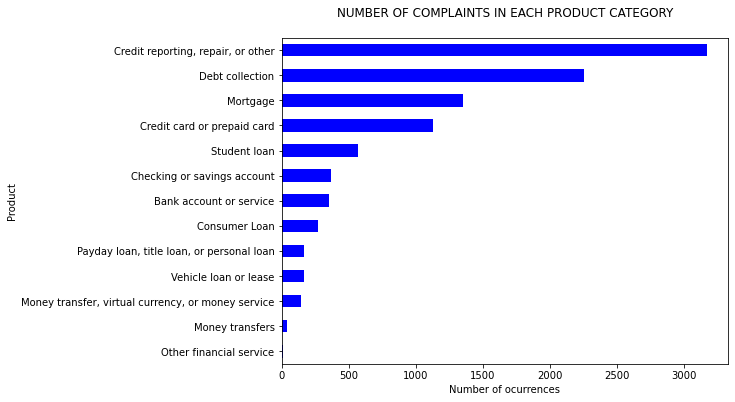

In [45]:
fig = plt.figure(figsize=(8,6))
colors = ['grey','grey','grey','grey','grey','grey','grey','grey','grey',
    'grey','darkblue','darkblue','darkblue']
df2.groupby('Product').Consumer_complaint.count().sort_values().plot.barh(
    ylim=0, color='Blue', title= 'NUMBER OF COMPLAINTS IN EACH PRODUCT CATEGORY\n')
plt.xlabel('Number of ocurrences', fontsize = 10);

## Text Preprocessing :

The text needs to be transformed to vectors so as the algorithms will be able make predictions. In this case it will be used the Term Frequency – Inverse Document Frequency (TFIDF) weight to evaluate how important a word is to a document in a collection of documents.

After removing punctuation and lower casing the words, importance of a word is determined in terms of its frequency.

“Term Frequency – Inverse Document Frequency
TF-IDF is the product of the TF and IDF scores of the term.

TF-IDF=TFIDF
 


Term Frequency : This summarizes how often a given word appears within a document.

TF=Number of times the term appears in the docTotal number of words in the doc
 


Inverse Document Frequency: This downscales words that appear a lot across documents. A term has a high IDF score if it appears in a few documents. Conversely, if the term is very common among documents (i.e., “the”, “a”, “is”), the term would have a low IDF score.

IDF=ln(Number of docsNumber docs the term appears in)
 


TF-IDF are word frequency scores that try to highlight words that are more interesting, e.g. frequent in a document but not across documents. The higher the TFIDF score, the rarer the term is. For instance, in a Mortgage complaint the word mortgage would be mentioned fairly often. However, if we look at other complaints, mortgage probably would not show up in many of them. We can infer that mortgage is most probably an important word in Mortgage complaints as compared to the other products. Therefore, mortgage would have a high TF-IDF score for Mortgage complaints.

TfidfVectorizer class can be initialized with the following parameters:

min_df: remove the words from the vocabulary which have occurred in less than ‘min_df’ number of files.
max_df: remove the words from the vocabulary which have occurred in more than _‘maxdf’ * total number of files in corpus.
sublinear_tf: set to True to scale the term frequency in logarithmic scale.
stop_words: remove the predefined stop words in 'english'.
use_idf: weight factor must use inverse document frequency.
ngram_range: (1, 2) to indicate that unigrams and bigrams will be considered.

In [46]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

# We transform each complaint into a vector
features = tfidf.fit_transform(df2.Consumer_complaint).toarray()

labels = df2.category_id

print("Each of the %d complaints is represented by %d features (TF-IDF score of unigrams and bigrams)" %(features.shape))

Each of the 10000 complaints is represented by 27507 features (TF-IDF score of unigrams and bigrams)


In [47]:
# Finding the three most correlated terms with each of the product categories
N = 3
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("\n==> %s:" %(Product))
  print("  * Most Correlated Unigrams are: %s" %(', '.join(unigrams[-N:])))
  print("  * Most Correlated Bigrams are: %s" %(', '.join(bigrams[-N:])))


==> Bank account or service:
  * Most Correlated Unigrams are: overdraft, bank, scottrade
  * Most Correlated Bigrams are: citigold checking, debit card, checking account

==> Checking or savings account:
  * Most Correlated Unigrams are: checking, branch, overdraft
  * Most Correlated Bigrams are: 00 bonus, overdraft fees, checking account

==> Consumer Loan:
  * Most Correlated Unigrams are: dealership, vehicle, car
  * Most Correlated Bigrams are: car loan, vehicle loan, regional acceptance

==> Credit card or prepaid card:
  * Most Correlated Unigrams are: express, citi, card
  * Most Correlated Bigrams are: balance transfer, american express, credit card

==> Credit reporting, repair, or other:
  * Most Correlated Unigrams are: report, experian, equifax
  * Most Correlated Bigrams are: credit file, equifax xxxx, credit report

==> Debt collection:
  * Most Correlated Unigrams are: collect, collection, debt
  * Most Correlated Bigrams are: debt collector, collect debt, collection 

### Spliting the data into train and test sets

The original data was divided into features (X) and target (y), which were then splitted into train (75%) and test (25%) sets. Thus, the algorithms would be trained on one set of data and tested out on a completely different set of data (not seen before by the algorithm).

In [48]:
X = df2['Consumer_complaint'] # Collection of documents
y = df2['Product'] # Target or the labels we want to predict (i.e., the 13 different complaints of products)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

### Models:

In [49]:
models = [
    RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]

# 5 Cross-validation
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))

entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

## Comparison of model performance

In [50]:
mean_accuracy = cv_df.groupby('model_name').accuracy.mean()
std_accuracy = cv_df.groupby('model_name').accuracy.std()

acc = pd.concat([mean_accuracy, std_accuracy], axis= 1, 
          ignore_index=True)
acc.columns = ['Mean Accuracy', 'Standard deviation']
acc

,Mean Accuracy,Standard deviation
model_name,,
LinearSVC,0.7791,0.005561
LogisticRegression,0.7641,0.009839
MultinomialNB,0.6475,0.004596
RandomForestClassifier,0.3949,0.006665


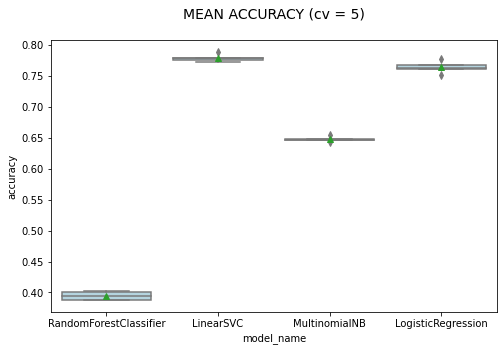

In [51]:
plt.figure(figsize=(8,5))
sns.boxplot(x='model_name', y='accuracy', 
            data=cv_df, 
            color='lightblue', 
            showmeans=True)
plt.title("MEAN ACCURACY (cv = 5)\n", size=14);

## Model Evaluation :

In [52]:
X_train, X_test, y_train, y_test,indices_train,indices_test = train_test_split(features, 
                                                               labels, 
                                                               df2.index, test_size=0.25, 
                                                               random_state=1)
model = LinearSVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [53]:
df2.head()

,Product,Consumer_complaint,category_id
310399,"Credit reporting, repair, or other",Bayview completely ignored laws and is reporti...,0
186155,"Credit reporting, repair, or other",inaccurate information no knowledge of account...,0
651135,Debt collection,On XXXX/XXXX/2016 I received a notice from Con...,1
515233,Consumer Loan,I have a loan with Kia Motor Finance. I rece...,2
641112,Credit card or prepaid card,I have a XXXX BIG card and made my payment whe...,3


In [54]:
df2['category_id'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

## Precision, Recall, F1-score :

In [55]:
print('\t\t\t\tCLASSIFICATIION METRICS\n')
print(metrics.classification_report(y_test, y_pred, 
                                    target_names= df2['Product'].unique()))

				CLASSIFICATIION METRICS

                                                    precision    recall  f1-score   support

                Credit reporting, repair, or other       0.81      0.88      0.84       783
                                   Debt collection       0.76      0.80      0.78       588
                                     Consumer Loan       0.52      0.22      0.31        73
                       Credit card or prepaid card       0.73      0.82      0.77       253
                                          Mortgage       0.87      0.92      0.90       340
                             Vehicle loan or lease       0.43      0.14      0.21        43
                                      Student loan       0.85      0.85      0.85       155
         Payday loan, title loan, or personal loan       0.50      0.17      0.26        40
                       Checking or savings account       0.61      0.60      0.61        85
                           Bank account or service

## Confusion Matrix :

A Confusion Matrix is a table which rows represent the actual class and columns represents the predicted class.

If we had a perfect model that always classifies correctly a new complaint, then the confusion matrix would have values in the diagonal only (where predicted label = actual label).

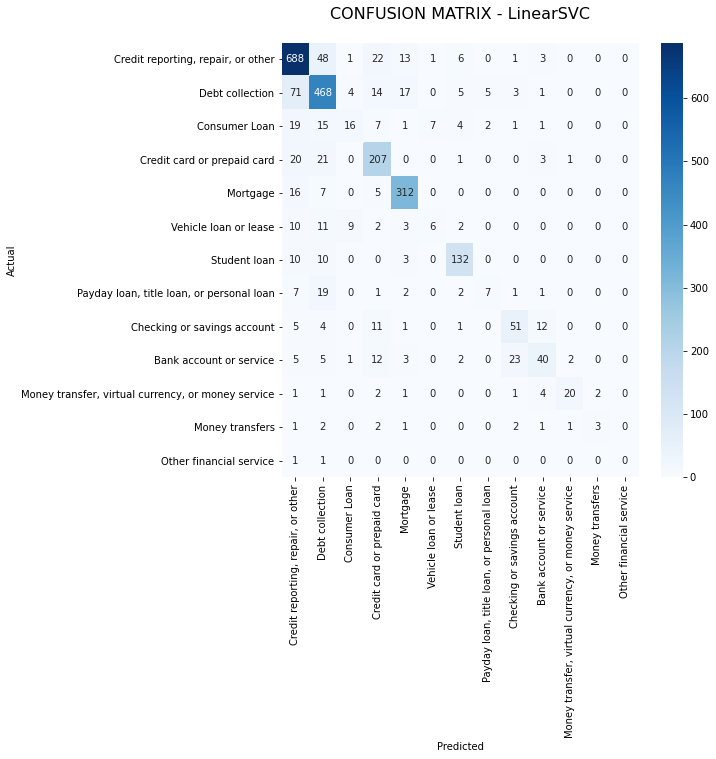

In [56]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(conf_mat, annot=True, cmap="Blues", fmt='d',
            xticklabels=category_id_df.Product.values, 
            yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title("CONFUSION MATRIX - LinearSVC\n", size=16);

## Predictions :

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25,
                                                    random_state = 0)

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5,
                        ngram_range=(1, 2), 
                        stop_words='english')

fitted_vectorizer = tfidf.fit(X_train)
tfidf_vectorizer_vectors = fitted_vectorizer.transform(X_train)

model = LinearSVC().fit(tfidf_vectorizer_vectors, y_train)

Let's see what is the classification that our model gives to this new complaint.

In [58]:
new_complaint = """I have been enrolled back at XXXX XXXX University in the XX/XX/XXXX. Recently, i have been harassed by \
Navient for the last month. I have faxed in paperwork providing them with everything they needed. And yet I am still getting \
phone calls for payments. Furthermore, Navient is now reporting to the credit bureaus that I am late. At this point, \
Navient needs to get their act together to avoid me taking further action. I have been enrolled the entire time and my \
deferment should be valid with my planned graduation date being the XX/XX/XXXX."""
print(model.predict(fitted_vectorizer.transform([new_complaint])))

['Student loan']


The algorithm has classified this text as a "Student loan" complaint. The complaint is regarding Student Loans and it has predicted it correctly.

In [59]:
new_complaint_2 = """I have been getting robo calls from a debt collection agency called " Alliance 1 \'\' for over XXXX months. 
The calls average XXXX times per week. They are attempting to collect a debt for someone whose name sounds 
like " XXXX XXXX \'\'. I am sick and tired of their harrassement and want the calls to stop. \n"""
print(model.predict(fitted_vectorizer.transform([new_complaint_2])))

['Debt collection']


Again, the algorithm correctly classified the caomplaint as "Debt collection". Although our model is not going to be all the time correct when classifying new complaints, it does a good job.